# Demo

When joins are getting messy, we may want to log them automatically to a pdf graph. That's what this notebook is all about!

In [4]:
# %load_ext autoreload
# %autoreload 2

import pandas as pd
from fake_data import generate
from notebook2diagram.er_graph import show_ER_graph, assert_python_version_sup

In [5]:
!python -V # python >= 3.8 is required
assert_python_version_sup('3.8')

Python 3.8.5


Let's first make some fake data to play with:

In [6]:
n = 100
policies = pd.DataFrame({'Policy_num':    generate('ean8', n), 
                         'Policy_holder': generate('name', n),
                         'SIREN':         generate('siren', n), 
                         'Subscription':  generate('date_this_decade', n)})

policies.tail(3)

,Policy_num,Policy_holder,SIREN,Subscription
97,31418690,Eugène Delmas-Camus,821 128 538,2020-01-10
98,81757275,Marie Weber,535 367 329,2020-09-16
99,11107545,Charles Pelletier,244 025 485,2020-08-14


In [7]:
companies = pd.DataFrame({'SIREN':        generate('siren', n), 
                          'Company_name': generate('company', n), 
                          'Slogan':       generate('catch_phrase', n)})

companies.tail(3)

,SIREN,Company_name,Slogan
97,738 818 705,Boulay,Le plaisir de concrétiser vos projets autrement
98,914 273 736,Fernandez SARL,Le confort de louer à l'état pur
99,920 645 766,Guyot S.A.R.L.,La liberté d'innover sans soucis


We then merge employees to their corresponding companies:

In [8]:
policies_and_companies = pd.merge(policies, companies, how='left', on='SIREN')

This line being commented, the graph will not take it into account:

In [9]:
# deprecated = pd.merge(companies, policies, how='left', on='whatever')

Let's add another table:

In [10]:
network = pd.DataFrame({'#policy': generate('ean8', n), 
                        'Town': generate('city', n)})
network.tail(3)

,#policy,Town
97,00616263,Besnard
98,22522337,Seguin-la-Forêt
99,90345265,Dos Santos


In [11]:
final = pd.merge(policies_and_companies, network, left_on='Policy_num', right_on='#policy', how='left')

In [12]:
show_ER_graph("Demo.ipynb")

This will result in the following:

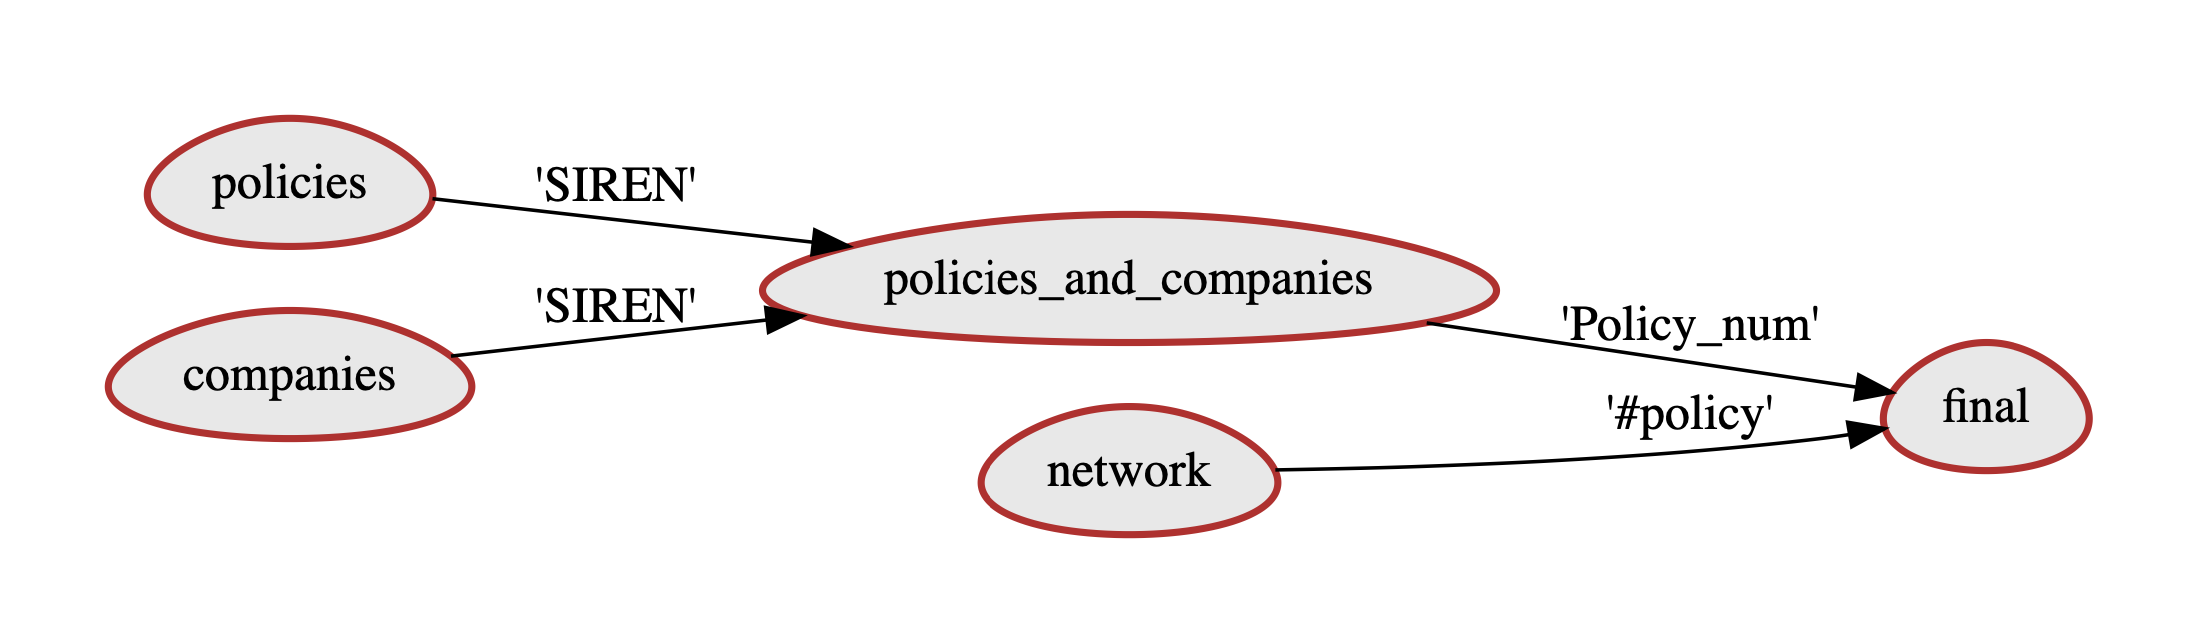